In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import models.Logistic_Regression as Logistic_Regression

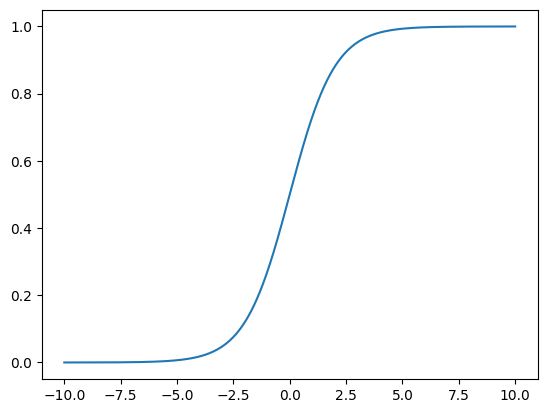

In [2]:
x = np.linspace(-10, 10, 1001)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)

In [3]:
df = pd.read_csv(r'D:\VsCode_python\Classic_ML\Logistic_Regression\Dataset\creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
samples, features = df.shape

print(samples, features)

284807 31


In [5]:
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

print(normal.shape, fraud.shape)

(284315, 31) (492, 31)


In [6]:
from sklearn.utils import resample
normal_undersampled = resample(normal, n_samples=len(fraud))
balanced_data = pd.concat([normal_undersampled, fraud])

In [7]:
balanced_data.shape

(984, 31)

In [26]:
lables = balanced_data['Class']
data = balanced_data.drop('Class', axis=1)


In [27]:
lables.shape

(984,)

In [ ]:
model = Logistic_Regression.LogisticRegression(iterations=10000)

In [36]:
train_data, test_data, train_labels, test_labels = train_test_split(data, lables, test_size=0.2)

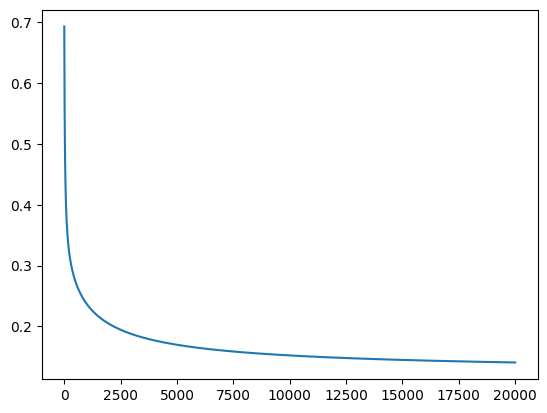

In [37]:
loss = model.fit(train_data, train_labels)
plt.plot(loss)

In [38]:
loss[-1]

0.14071070183025383

In [39]:
predictions = model.predict(test_data)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predictions)

0.9390862944162437